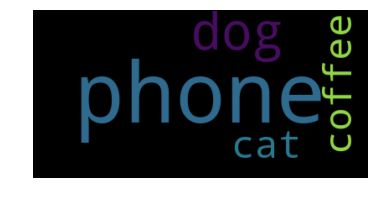

In [145]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

text = "coffee phone phone phone phone phone phone phone phone phone cat dog dog"

# Generate a word cloud image
wordcloud = WordCloud(max_font_size=100).generate(text)

# Display the generated image:
# the matplotlib way:

fig = plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('../../assets/images/markdown_img/wordcloud_ex1.svg')

In [146]:
import requests

def read_img_from_url_and_return_matrix(url):
    response = requests.get(url)
    #print("binary file sample: {}".format(response.content[:20]))

    from PIL import Image 
    from io import BytesIO 

    img = Image.open(BytesIO(response.content))
    img_matrix = np.array(img)
    # plt.imshow(img_matrix)
    # img.save('aaa.png')
    return img_matrix

url = "https://amueller.github.io/word_cloud/_images/sphx_glr_colored_003.png"
img_matrix = read_img_from_url_and_return_matrix(url)

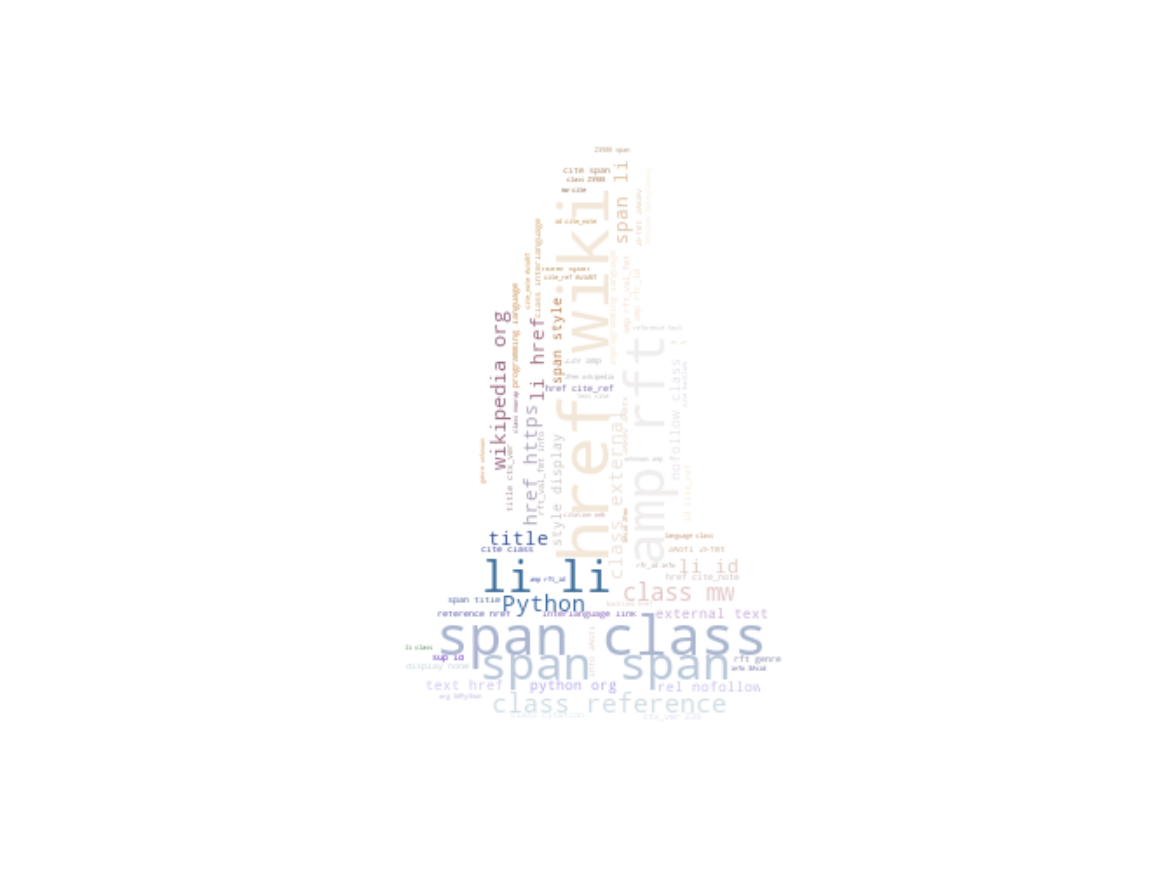

In [147]:
import requests
def read_img_from_url_and_return_matrix(url):
    response = requests.get(url)
    #print("binary file sample: {}".format(response.content[:20]))

    from PIL import Image 
    from io import BytesIO 

    img = Image.open(BytesIO(response.content))
    img_matrix = np.array(img)
    # plt.imshow(img_matrix)
    # img.save('aaa.png')
    return img_matrix

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator

def make_ImageColoredWordcloud(text, img_matrix, outputfile_name):
    wc = WordCloud(background_color="white", max_words=2000, mask=img_matrix, max_font_size=40, random_state=42)
    # generate word cloud
    wc.generate(text)
    f = plt.figure(figsize=(20, 20))
    plt.imshow(wc.recolor(color_func=ImageColorGenerator(img_matrix)), interpolation="bilinear")
    plt.axis("off")
    plt.savefig(outputfile_name)
    
url = "https://amueller.github.io/word_cloud/_images/sphx_glr_colored_003.png"
img_matrix = read_img_from_url_and_return_matrix(url)
text = requests.get("https://en.wikipedia.org/wiki/Python_(programming_language)").text
make_ImageColoredWordcloud(text, img_matrix, '../../assets/images/markdown_img/'+'coloredWordCloud.svg')